In [ ]:
import numpy as np
import pandas as pd

# 데이터 시뮬레이션 (랜덤 데이터 생성)
np.random.seed(42)
num_samples = 500

temperature = np.random.uniform(15, 35, num_samples)  # 15°C ~ 35°C
humidity = np.random.uniform(50, 90, num_samples)     # 50% ~ 90%
light_intensity = np.random.uniform(200, 600, num_samples)  # 200 ~ 600 MJ

# 당도, 산도, 당/산 비율 계산
brix = 6.0 + 0.03 * light_intensity - 0.015 * humidity + np.random.normal(0, 0.5, num_samples)
acidity = 0.7 - 0.002 * light_intensity + 0.008 * humidity + np.random.normal(0, 0.1, num_samples)
sugar_acid_ratio = brix / acidity + np.random.normal(0, 0.2, num_samples)

# 데이터프레임 생성
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Light_Intensity': light_intensity,
    'Brix': brix,
    'Acidity': acidity,
    'Sugar_Acid_Ratio': sugar_acid_ratio
})

# 데이터 확인
data.head()


,Temperature,Humidity,Light_Intensity,Brix,Acidity,Sugar_Acid_Ratio
0,22.490802,77.926469,274.053172,11.802995,0.907017,12.790691
1,34.014286,71.443855,416.760379,18.576625,0.426223,43.633563
2,29.639879,62.381105,549.178334,20.844847,-0.111493,-186.860857
3,26.973170,82.551801,492.889955,18.725722,0.313852,59.892153
4,18.120373,77.389247,522.624459,21.029180,0.403565,52.424705


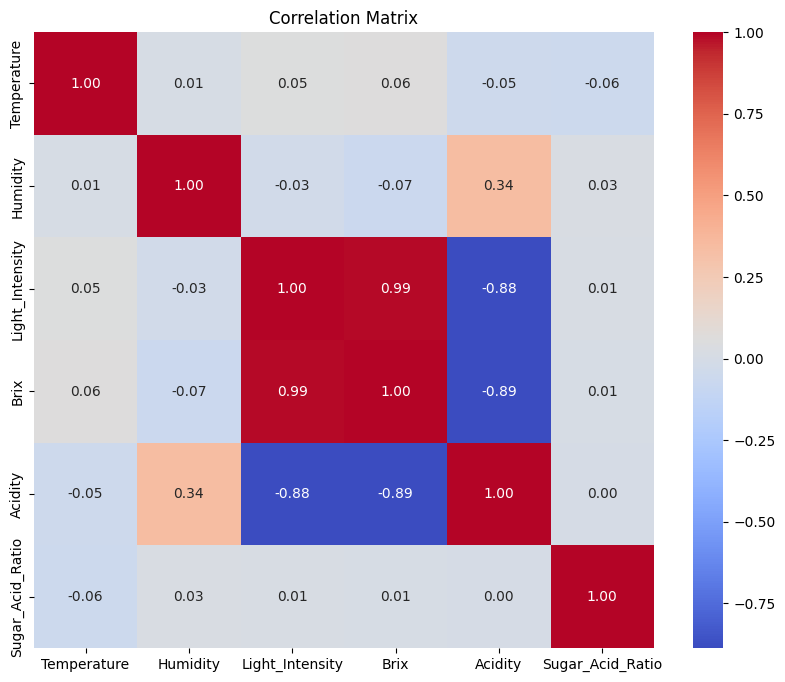

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation = data.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 입력 변수와 출력 변수 분리
X = data[['Temperature', 'Humidity', 'Light_Intensity']]
y = data[['Brix', 'Acidity', 'Sugar_Acid_Ratio']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 회귀 모델 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred = linear_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 51430.676595700614
R-squared: 0.5795399933644371


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 평가
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)


Random Forest Mean Squared Error: 123364.49233159593
Random Forest R-squared: 0.0405184714115799


In [9]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 97 kB/s s eta 0:00:01    |███████▏                        | 53.7 MB 48.5 MB/s eta 0:00:04
     |████████████████████████████████| 25.8 MB 36.0 MB/s eta 0:00:01     |████████████████████████████▊   | 23.2 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 36.9 MB/s eta 0:00:01
     |████████████████████████████████| 396 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 2.9 MB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 41.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 46.0 MB/s eta 0:00:01
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     |████████████████████████████████| 417 kB 42.1 MB/s eta 0:00:01
     |████████████████████████████████

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network 모델 설계 (개선된 구조)
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # 128 노드로 확장
    Dropout(0.2),  # 드롭아웃 추가 (20%)
    Dense(64, activation='relu'),  # 중간층 추가
    Dropout(0.2),
    Dense(32, activation='relu'),  # 더 작은 레이어 추가
    Dense(y_train.shape[1])  # 출력층 (회귀 문제에서는 활성화 함수 없음)
])

# 모델 컴파일 (Adam 옵티마이저 & 학습률 조정)
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# 모델 학습
history = nn_model.fit(
    X_train_scaled, y_train, 
    epochs=100,  # 에포크 수 증가
    batch_size=16,  # 배치 크기 조정
    validation_split=0.2,  # 검증 데이터 비율
    verbose=1
)

# 테스트 데이터로 평가
nn_loss, nn_mae = nn_model.evaluate(X_test_scaled, y_test)
print("Improved Neural Network Loss:", nn_loss)
print("Improved Neural Network MAE:", nn_mae)



/Users/hwang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


NameError: name 'X_train' is not defined

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기
import pandas as pd
data = pd.read_csv('temperature_humidity_solar_quality_data.csv')

# 입력 변수 (온도, 습도, 일사량)
X = data[['Temperature', 'Humidity', 'Solar Radiation']]

# 출력 변수 (당도, 산도, 비타민 C)
y = data[['Sugar Content (Brix)', 'Acidity (pH)', 'Vitamin C (mg/100g)']]

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 다중 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred_linear = linear_model.predict(X_test)

# 성능 평가
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# 2. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

linear_mse, linear_r2, rf_mse, rf_r2


(np.float64(8.972471066779403e-30),
 1.0,
 np.float64(0.10418199759421949),
 0.9859994028029188)

In [8]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 가상의 데이터 생성
np.random.seed(42)

# 온도, 습도, 일사량 생성 (3개 환경 변수)
temperature = np.random.uniform(15, 30, 1000)  # 15°C ~ 30°C
humidity = np.random.uniform(30, 90, 1000)    # 30% ~ 90%
solar_radiation = np.random.uniform(100, 1000, 1000)  # 100 ~ 1000 MJ

# 품질 예측 변수 생성 (당도, 산도) - 임의의 관계
sweetness = 5 + 0.1 * temperature - 0.05 * humidity + 0.001 * solar_radiation + np.random.normal(0, 0.5, 1000)
acidity = 0.5 + 0.05 * (30 - temperature) + 0.02 * humidity - 0.001 * solar_radiation + np.random.normal(0, 0.1, 1000)

# 품질 변수들 (당도, 산도)를 목표 변수로 설정
X = np.column_stack((temperature, humidity, solar_radiation))
y = np.column_stack((sweetness, acidity))

# 데이터 분할 (훈련용, 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)


Random Forest Mean Squared Error: 0.18135472179824472
Random Forest R-squared: 0.8209132533696519


In [ ]:
import pandas as pd

# 경로를 정확하게 지정하여 CSV 파일 불러오기
data = pd.read_csv('temperature_humidity_solar_quality_data.csv')  # 파일 경로를 정확히 적어주세요.

# 데이터 확인
print(data.head())
print(data.info())


     온도       습도  이산화탄소    일사량
0  7.06  10.2445   1037   99.4
1  7.18  10.5215   1040  120.4
2  7.14  10.5600   1041  120.4
3  7.20  10.8755   1038  119.8
4  7.26  11.0140   1035  119.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   온도      99 non-null     float64
 1   습도      99 non-null     float64
 2   이산화탄소   99 non-null     int64  
 3   일사량     99 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.2 KB
None


In [18]:
# 결측값 확인
print(data.isnull().sum())

# 결측값 처리 (결측값이 있는 행 삭제)
data = data.dropna()

# 결측값을 평균값으로 채우기
data = data.fillna(data.mean())


온도       0
습도       0
이산화탄소    0
일사량      0
dtype: int64


In [26]:
import pandas as pd

# 환경 변수와 품질 요인 계산 결과
data = {
    '온도 (Temp) 변화 (°C)': [2],
    '일조량 (Sunlight) 변화 (%)': [5],
    '상대 습도 (RH) 변화 (%)': [10],
    'CO2 농도 (ppm) 변화': [50],
    '초기 당도 (Brix)': [6.5],
    '당도 (Brix) 계산 결과': [6.915],
    '초기 산도 (Acidity)': [0.6],
    '산도 (Acidity) 계산 결과': [0.64],
    '초기 경도 (Hardness)': [2.5],
    '경도 (Hardness) 계산 결과': [2.48],
    '초기 비타민 C (mg/100g)': [15.0],
    '비타민 C (mg/100g) 계산 결과': [15.65]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# CSV 파일로 저장
df.to_csv('environment_quality_factors.csv', index=False)

print("CSV 파일이 생성되었습니다.")


CSV 파일이 생성되었습니다.


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 예시 (온도, 습도, 이산화탄소, 일사량, 당도)
data = {
    '온도': [7.06, 7.18, 7.14, 7.2, 7.26],
    '습도': [10.2445, 10.5215, 10.56, 10.8755, 11.014],
    '이산화탄소': [1037, 1040, 1041, 1038, 1035],
    '일사량': [99.4, 120.4, 120.4, 119.8, 119.4],
    '당도': [4.2, 4.0, 4.8, 4.5, 4.7]  # 예시 당도 값
}

# DataFrame으로 변환
df = pd.DataFrame(data)

# 특징 변수와 목표 변수 나누기
X = df[['온도', '습도', '이산화탄소', '일사량']]
y = df['당도']  # 예시로 당도를 예측한다고 가정

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 예측 값 출력
print(f'예측된 당도 값: {y_pred}')


Mean Squared Error: 1.2311291336590966
예측된 당도 값: [5.10956259]


In [22]:
# CSV 파일에서 읽어온 데이터의 열 이름 확인
print(data.columns)


Index(['온도', '습도', '이산화탄소', '일사량'], dtype='object')


In [25]:
print(data.columns)


Index(['온도', '습도', '이산화탄소', '일사량'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 읽기
data = pd.read_csv('')

# 환경 변수 (X)와 품질 변수 (y) 지정
# 환경 변수: '온도', '습도', '이산화탄소', '일사량'
# 품질 변수: '당도', '산도', '비타민'
X = data[['온도', '습도', '이산화탄소', '일사량']]  # 환경 변수
y = data[['당도', '산도', '비타민']]  # 품질 변수

# 학습용 데이터와 테스트용 데이터로 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],  # 트리의 수
    'max_depth': [None, 10, 20, 30, 40],         # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],             # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],               # 리프 노드의 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],      # max_features를 'sqrt', 'log2', 또는 None으로 설정
    'bootstrap': [True, False]                   # 부트스트랩 샘플링 여부
}

# RandomizedSearchCV 적용 (10회 랜덤 샘플링)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 확인
print("Best hyperparameters found: ", random_search.best_params_)

# 최적의 모델로 예측
best_rf = random_search.best_estimator_

# 품질 변수 (당도, 산도, 비타민)에 대해 각각 예측 수행
y_pred = best_rf.predict(X_test)

# 각 품질 변수에 대한 성능 평가
for i, column in enumerate(y.columns):
    mse = mean_squared_error(y_test[column], y_pred[:, i])
    r2 = r2_score(y_test[column], y_pred[:, i])
    print(f"Optimized Random Forest Mean Squared Error for {column}: {mse}")
    print(f"Optimized Random Forest R-squared for {column}: {r2}")


KeyError: "None of [Index(['당도', '산도', '비타민'], dtype='object')] are in the [columns]"

In [ ]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 가상의 데이터 생성
np.random.seed(42)

# 온도, 습도, 일사량 생성 (3개 환경 변수)
temperature = np.random.uniform(15, 30, 1000)  # 15°C ~ 30°C
humidity = np.random.uniform(30, 90, 1000)    # 30% ~ 90%
solar_radiation = np.random.uniform(100, 1000, 1000)  # 100 ~ 1000 MJ

# 품질 예측 변수 생성 (당도, 산도) - 임의의 관계
sweetness = 5 + 0.1 * temperature - 0.05 * humidity + 0.001 * solar_radiation + np.random.normal(0, 0.5, 1000)
acidity = 0.5 + 0.05 * (30 - temperature) + 0.02 * humidity - 0.001 * solar_radiation + np.random.normal(0, 0.1, 1000)

# 품질 변수들 (당도, 산도)를 목표 변수로 설정
X = np.column_stack((temperature, humidity, solar_radiation))
y = np.column_stack((sweetness, acidity))

# 데이터 분할 (훈련용, 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R-squared:", r2)


/Users/hwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


NameError: name 'nn_model' is not defined

NameError: name 'nn_model' is not defined

In [7]:
import streamlit as st

st.title("토마토 품질 예측 시스템")

# 사용자 입력 받기
temp = st.slider("온도 (°C)", 15, 35, 25)
humidity = st.slider("습도 (%)", 50, 90, 65)
light = st.slider("일조량 (MJ)", 200, 600, 400)

# 예측 실행
if st.button("예측 실행"):
    prediction = predict_quality(temp, humidity, light)
    st.write("Random Forest Prediction:", prediction["Random Forest Prediction"])
    st.write("Neural Network Prediction:", prediction["Neural Network Prediction"])


ModuleNotFoundError: No module named 'streamlit'